In [1]:
import unicodecsv
import pandas as pd
import datetime as dt
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.0f}'.format

In [2]:
flight_data = pd.read_csv("DelayedFlights.csv")
flight_data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,nan,nan,nan,nan,nan


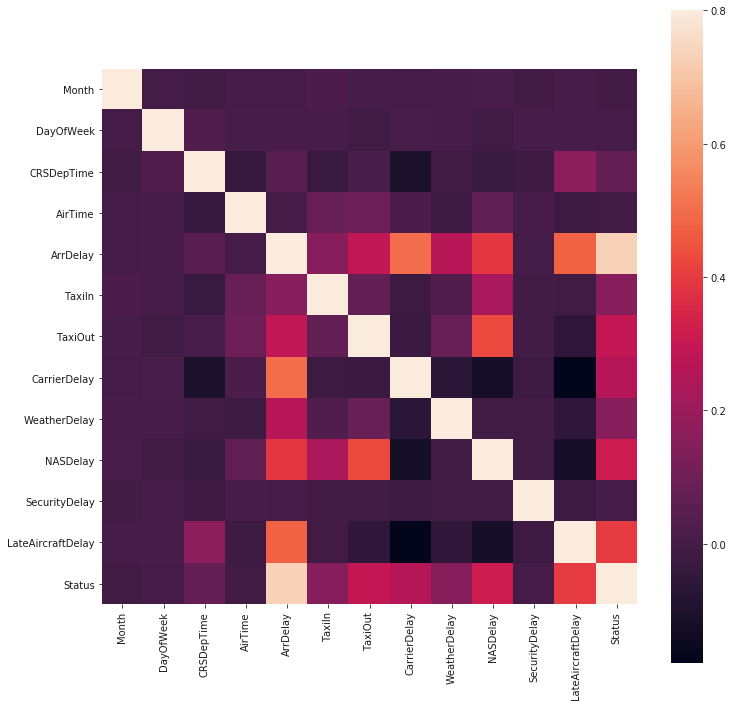

In [15]:
corrmat = flight_data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [4]:
flight_data['DepDate'] = pd.to_datetime(flight_data.Year*10000+flight_data.Month*100+flight_data.DayofMonth,format='%Y%m%d')
for dataset in flight_data:
    flight_data.loc[flight_data['ArrDelay'] <= 15, 'Status'] = 0
    flight_data.loc[flight_data['ArrDelay'] >= 15, 'Status'] = 1
    flight_data.loc[flight_data['ArrDelay'] >= 60, 'Status'] = 2
    flight_data.loc[flight_data['Diverted'] == 1, 'Status'] = 3
    flight_data.loc[flight_data['Cancelled'] == 1, 'Status'] = 4
    
flight_data.loc[flight_data["CancellationCode"] =="A", 'CancellationCode'] = "0"
flight_data.loc[flight_data["CancellationCode"] =="B", 'CancellationCode'] = "1"
flight_data.loc[flight_data["CancellationCode"] =="C", 'CancellationCode'] = "2"

#Data cleaning
flight_data = flight_data.drop("Unnamed: 0",1) #Empty
flight_data = flight_data.drop("Year",1) #Converted to date
flight_data = flight_data.drop("DayofMonth",1) #Converted to date
flight_data = flight_data.drop("DepTime",1) #Of the departure data we only keep the expected 
flight_data = flight_data.drop("DepDelay",1)
flight_data = flight_data.drop("ArrTime",1)
flight_data = flight_data.drop("CRSArrTime",1)
flight_data = flight_data.drop("ActualElapsedTime",1)
flight_data = flight_data.drop("CRSElapsedTime",1)
flight_data = flight_data.drop("Diverted",1)
flight_data = flight_data.drop("Cancelled",1)
flight_data = flight_data.drop("Distance",1)
flight_data = flight_data.drop("FlightNum",1)
flight_data = flight_data.drop("TailNum",1)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


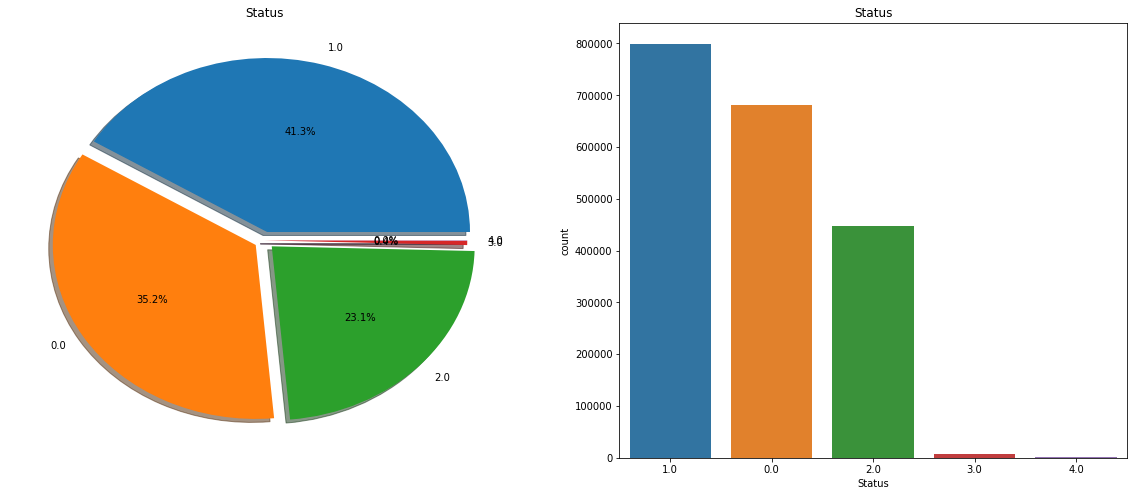

Status represents wether the flight was:on time (0) slightly delayed (1) highly delayed (2) diverted (3) or cancelled (4)


In [6]:
f,ax=plt.subplots(1,2,figsize=(20,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
flight_data['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status', order = flight_data['Status'].value_counts().index, data=flight_data,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print("Status represents wether the flight was:"
      "on time (0)", 
      "slightly delayed (1)", 
      "highly delayed (2)", 
      "diverted (3)", 
      "or cancelled (4)")

In [7]:
df_delayed = flight_data[(flight_data.Status >= 1) &(flight_data.Status < 3)]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


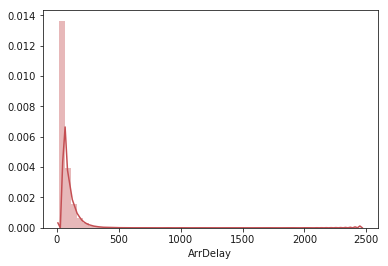

In [8]:
sns.set_color_codes()
sns.distplot(df_delayed['ArrDelay'],color="r")
plt.show()

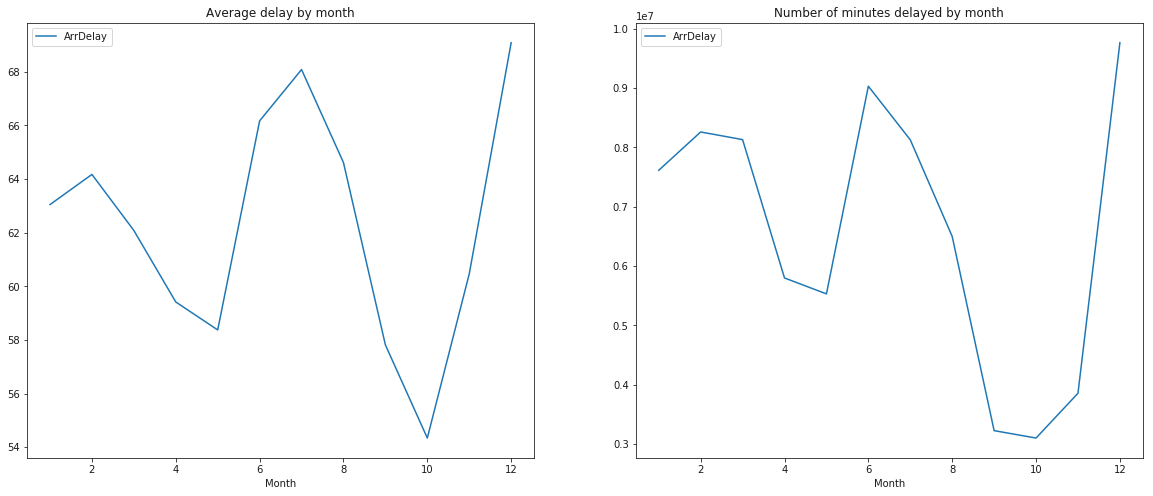

In [9]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_delayed[['Month','ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
df_delayed[['Month','ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

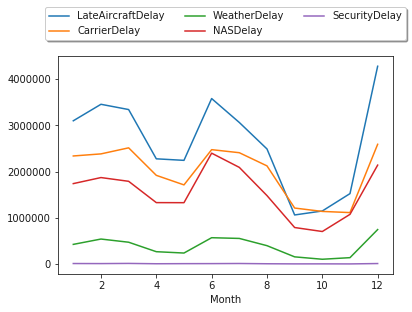

In [10]:
df2 = df_delayed.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

In [11]:
flight_data['UniqueCarrier'].value_counts()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

In [13]:
sns.barplot('UniqueCarrier','CarrierDelay', data=df_delayed, order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


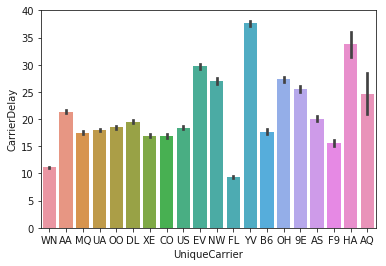

In [14]:
plt.show()